Importing imporatnt libraires

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(path, names=['score','id','date','query','username','tweet'], encoding='latin-1')
df.drop(labels=['id','date','query','username'],axis=1,inplace=True)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,score,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Data Preprocessing

convert to lowercase

In [ ]:
df['tweet']=df['tweet'].str.lower()
df.head()

,score,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


HTML tags

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["tweet"] = df["tweet"].apply(lambda text: remove_html(text))
df.head()

,score,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


usernames

In [ ]:
def remove_ussr(text):
    html_pattern = re.compile('@[\w]+')
    return html_pattern.sub(r'', text)

df["tweet"] = df["tweet"].apply(lambda text: remove_ussr(text))
df.head()

,score,tweet
0,0,"http://twitpic.com/2y1zl - awww, that's a bum..."
1,0,is upset that he can't update his facebook by ...
2,0,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."


converting chat words

remove URLs and hyphens

In [ ]:
url_pattern = re.compile(r'https?://\S+|www\.\S+@#')

def remove_urls(text):
    return url_pattern.sub(r'', text)

df["tweet"] = df["tweet"].apply(lambda text: remove_urls(text))

df.head()

,score,tweet
0,0,"- awww, that's a bummer. you shoulda got da..."
1,0,is upset that he can't update his facebook by ...
2,0,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."


Removes punctuation

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["tweet"] = df["tweet"].apply(lambda text: remove_punctuation(text))
df.head()

,score,tweet
0,0,awww thats a bummer you shoulda got david ...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i he...


In [ ]:
abr = {
        "awww" : "cute",
       "awwww" : "cute",
       "awwwww" : "cute",
       "awwwwww" : "cute",
       "awwwwwww" : "cute",
       "awwwwwwww" : "cute",
       "awwwwwwwww" : "cute",
        "$" : " dollar ",
        "€" : " euro ",
        "4ao" : "for adults only",
        "a.m" : "before midday",
        "a3" : "anytime anywhere anyplace",
        "aamof" : "as a matter of fact",
        "acct" : "account",
        "adih" : "another day in hell",
        "afaic" : "as far as i am concerned",
        "afaict" : "as far as i can tell",
        "afaik" : "as far as i know",
        "afair" : "as far as i remember",
        "afk" : "away from keyboard",
        "app" : "application",
        "approx" : "approximately",
        "apps" : "applications",
        "asap" : "as soon as possible",
        "asl" : "age, sex, location",
        "atk" : "at the keyboard",
        "ave." : "avenue",
        "aymm" : "are you my mother",
        "ayor" : "at your own risk", 
        "b&b" : "bed and breakfast",
        "b+b" : "bed and breakfast",
        "b.c" : "before christ",
        "b2b" : "business to business",
        "b2c" : "business to customer",
        "b4" : "before",
        "b4n" : "bye for now",
        "b@u" : "back at you",
        "bae" : "before anyone else",
        "bak" : "back at keyboard",
        "bbbg" : "bye bye be good",
        "bbc" : "british broadcasting corporation",
        "bbias" : "be back in a second",
        "bbl" : "be back later",
        "bbs" : "be back soon",
        "be4" : "before",
        "bfn" : "bye for now",
        "blvd" : "boulevard",
        "bout" : "about",
        "brb" : "be right back",
        "bros" : "brothers",
        "brt" : "be right there",
        "bsaaw" : "big smile and a wink",
        "btw" : "by the way",
        "bwl" : "bursting with laughter",
        "c/o" : "care of",
        "cet" : "central european time",
        "cf" : "compare",
        "cia" : "central intelligence agency",
        "csl" : "can not stop laughing",
        "cu" : "see you",
        "cul8r" : "see you later",
        "cv" : "curriculum vitae",
        "cwot" : "complete waste of time",
        "cya" : "see you",
        "cyt" : "see you tomorrow",
        "dae" : "does anyone else",
        "dbmib" : "do not bother me i am busy",
        "diy" : "do it yourself",
        "dm" : "direct message",
        "dwh" : "during work hours",
        "e123" : "easy as one two three",
        "eet" : "eastern european time",
        "eg" : "example",
        "embm" : "early morning business meeting",
        "encl" : "enclosed",
        "encl." : "enclosed",
        "etc" : "and so on",
        "faq" : "frequently asked questions",
        "fawc" : "for anyone who cares",
        "fb" : "facebook",
        "fc" : "fingers crossed",
        "fig" : "figure",
        "fimh" : "forever in my heart", 
        "ft." : "feet",
        "ft" : "featuring",
        "ftl" : "for the loss",
        "ftw" : "for the win",
        "fwiw" : "for what it is worth",
        "fyi" : "for your information",
        "g9" : "genius",
        "gahoy" : "get a hold of yourself",
        "gal" : "get a life",
        "gcse" : "general certificate of secondary education",
        "gfn" : "gone for now",
        "gg" : "good game",
        "gl" : "good luck",
        "glhf" : "good luck have fun",
        "gmt" : "greenwich mean time",
        "gmta" : "great minds think alike",
        "gn" : "good night",
        "g.o.a.t" : "greatest of all time",
        "goat" : "greatest of all time",
        "goi" : "get over it",
        "gps" : "global positioning system",
        "gr8" : "great",
        "gratz" : "congratulations",
        "gyal" : "girl",
        "h&c" : "hot and cold",
        "hp" : "horsepower",
        "hr" : "hour",
        "hrh" : "his royal highness",
        "ht" : "height",
        "ibrb" : "i will be right back",
        "ic" : "i see",
        "icq" : "i seek you",
        "icymi" : "in case you missed it",
        "idc" : "i do not care",
        "idgadf" : "i do not give a damn fuck",
        "idgaf" : "i do not give a fuck",
        "idk" : "i do not know",
        "ie" : "that is",
        "i.e" : "that is",
        "ifyp" : "i feel your pain",
        "ig" : "instagram",
        "iirc" : "if i remember correctly",
        "ilu" : "i love you",
        "ily" : "i love you",
        "imho" : "in my humble opinion",
        "imo" : "in my opinion",
        "imu" : "i miss you",
        "iow" : "in other words",
        "irl" : "in real life",
        "j4f" : "just for fun",
        "jic" : "just in case",
        "jk" : "just kidding",
        "jsyk" : "just so you know",
        "l8r" : "later",
        "lb" : "pound",
        "lbs" : "pounds",
        "ldr" : "long distance relationship",
        "lmao" : "laugh my ass off",
        "lmfao" : "laugh my fucking ass off",
        "lol" : "laughing out loud",
        "ltd" : "limited",
        "ltns" : "long time no see",
        "m8" : "mate",
        "mf" : "motherfucker",
        "mfs" : "motherfuckers",
        "mfw" : "my face when",
        "mofo" : "motherfucker",
        "mph" : "miles per hour",
        "mr" : "mister",
        "mrw" : "my reaction when",
        "ms" : "miss",
        "mte" : "my thoughts exactly",
        "nagi" : "not a good idea",
        "nbc" : "national broadcasting company",
        "nbd" : "not big deal",
        "nfs" : "not for sale",
        "ngl" : "not going to lie",
        "nhs" : "national health service",
        "nrn" : "no reply necessary",
        "nsfl" : "not safe for life",
        "nsfw" : "not safe for work",
        "nth" : "nice to have",
        "nvr" : "never",
        "nyc" : "new york city",
        "oc" : "original content",
        "og" : "original",
        "ohp" : "overhead projector",
        "oic" : "oh i see",
        "omdb" : "over my dead body",
        "omg" : "oh my god",
        "omw" : "on my way",
        "p.a" : "per annum",
        "p.m" : "after midday",
        "pm" : "prime minister",
        "poc" : "people of color",
        "pov" : "point of view",
        "pp" : "pages",
        "ppl" : "people",
        "prw" : "parents are watching",
        "ps" : "postscript",
        "pt" : "point",
        "ptb" : "please text back",
        "pto" : "please turn over",
        "qpsa" : "what happens", 
        "ratchet" : "rude",
        "rbtl" : "read between the lines",
        "rlrt" : "real life retweet", 
        "rofl" : "rolling on the floor laughing",
        "roflol" : "rolling on the floor laughing out loud",
        "rotflmao" : "rolling on the floor laughing my ass off",
        "rt" : "retweet",
        "ruok" : "are you ok",
        "sfw" : "safe for work",
        "sk8" : "skate",
        "smh" : "shake my head",
        "sq" : "square",
        "srsly" : "seriously", 
        "ssdd" : "same stuff different day",
        "tbh" : "to be honest",
        "tbs" : "tablespooful",
        "tbsp" : "tablespooful",
        "tfw" : "that feeling when",
        "thks" : "thank you",
        "tho" : "though",
        "thx" : "thank you",
        "tia" : "thanks in advance",
        "til" : "today i learned",
        "tl;dr" : "too long i did not read",
        "tldr" : "too long i did not read",
        "tmb" : "tweet me back",
        "tntl" : "trying not to laugh",
        "ttyl" : "talk to you later",
        "u" : "you",
        "u2" : "you too",
        "u4e" : "yours for ever",
        "utc" : "coordinated universal time",
        "w/" : "with",
        "w/o" : "without",
        "w8" : "wait",
        "wassup" : "what is up",
        "wb" : "welcome back",
        "wtf" : "what the fuck",
        "wtg" : "way to go",
        "wtpa" : "where the party at",
        "wuf" : "where are you from",
        "wuzup" : "what is up",
        "wywh" : "wish you were here",
        "yd" : "yard",
        "ygtr" : "you got that right",
        "ynk" : "you never know",
        "zzz" : "sleeping bored and tired"
    }

In [ ]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w in abr.keys():
            new_text.append(abr[w])
        else:
            new_text.append(w)
    return " ".join(new_text)

df["tweet"] = df["tweet"].apply(lambda text: chat_words_conversion(text))
df.head()

,score,tweet
0,0,cute thats a bummer you shoulda got david carr...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...


Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stopword = set(stopwords.words('english'))


def stopWords(text):
    token = word_tokenize(text)
    token_ = [i for i in token if i not in stopword]

    return ' '.join(token_)

df["tweet"] = df["tweet"].apply(lambda text: stopWords(text))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,score,tweet
0,0,cute thats bummer shoulda got david carr third...
1,0,upset cant update facebook texting might cry r...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see


Removing Short and Long words

In [ ]:
def filterNormal(text):
    final = []
    for w in text.split():
        if len(w)>1 and len(w)<14:
            final.append(w)
    
    return ' '.join(final)

df['tweet'] = df['tweet'].apply(lambda text: filterNormal(text))
df.head()



,score,tweet
0,0,cute thats bummer shoulda got david carr third...
1,0,upset cant update facebook texting might cry r...
2,0,dived many times ball managed save 50 rest go ...
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see


Removing numbers

In [ ]:

def removeNum(text):
    final = []
    for w in text.split():
        if any(i.isdigit() for i in w):
            continue
        else:
            final.append(w)
    return ' '.join(final)

df['tweet'] = df['tweet'].apply(lambda text: removeNum(text))
df.head()


,score,tweet
0,0,cute thats bummer shoulda got david carr third...
1,0,upset cant update facebook texting might cry r...
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,behaving im mad cant see


Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df["tweet"] = df["tweet"].apply(lambda text: stem_words(text))
df.head()

,score,tweet
0,0,cute that bummer shoulda got david carr third day
1,0,upset cant updat facebook text might cri resul...
2,0,dive mani time ball manag save rest go bound
3,0,whole bodi feel itchi like fire
4,0,behav im mad cant see


In [ ]:
df.dropna(inplace=True)

Save as a cleaned CSV file

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/data1.csv')
df.head()

,Unnamed: 0,score,tweet
0,0,0,cute that bummer shoulda got david carr third day
1,1,0,upset cant updat facebook text might cri resul...
2,2,0,dive mani time ball manag save rest go bound
3,3,0,whole bodi feel itchi like fire
4,4,0,behav im mad cant see


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = df.sample(frac=1)

X = df.tweet.values
Y = df.score.values

vector = TfidfVectorizer(max_features=40000,lowercase=False,stop_words='english')
X = vector.fit_transform(X)

print("No of features: "+str(len(vector.get_feature_names())))

No of features: 40000


In [31]:
df.dropna(inplace=True)

In [28]:
def plot_cloud(wordcloud):
   
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud) 
    plt.axis("off");

def listToString(s): 
    str1 = " " 

    return (str1.join(s))

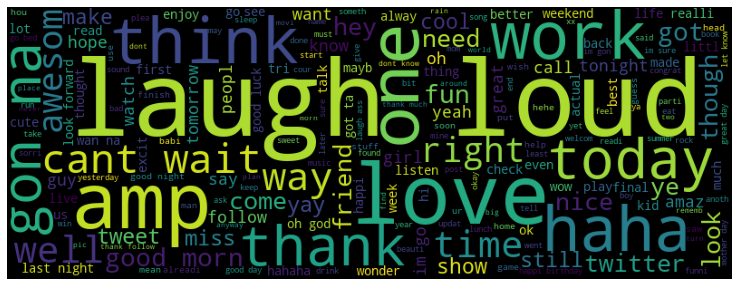

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
textString=listToString(df[df.score==4]["tweet"])
wordcloud = WordCloud(width = 800, height = 300).generate(textString)

plot_cloud(wordcloud)

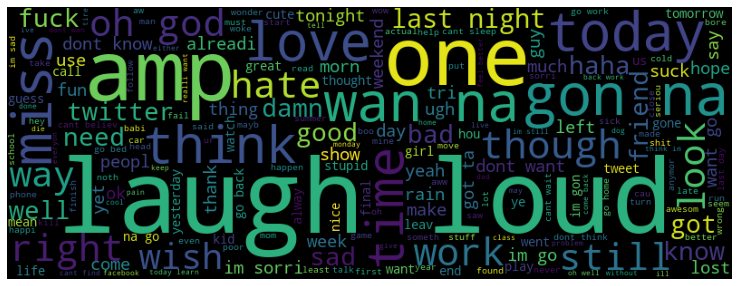

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
textString=listToString(df[df.score==0]["tweet"])
wordcloud = WordCloud(width = 800, height = 300).generate(textString)

plot_cloud(wordcloud)